In [26]:
# Importing important libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import re
import os
import json
import time
import warnings
import matplotlib.pyplot as plt

In [27]:
# reading csv as a Pandas DataFrame
df = pd.read_csv('/home/reshu/Desktop/train_bFQbE3f/train.csv')

In [28]:
#data-preprocessing
#inspecting heads
df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [29]:
#inspecting tails
df.tail()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
32815,43723,saving,M,43,583,45275.2,NaN,48901.62,NaN,47267.41,...,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,NaN,11192.56,3691
32816,32511,current,M,33,623,1627.0,NaN,3494.54,1393.0,3242.00,...,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,NaN,3702.50,4275
32817,5192,current,M,25,245,22409.0,2538.0,41241.00,639.0,2087.00,...,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,NaN,0.00,1677
32818,12172,current,M,33,535,9877.3,373.0,9018.22,NaN,2804.00,...,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,NaN,1716.37,846
32819,33003,current,M,32,254,18797.0,NaN,6210.48,NaN,2196.00,...,7.0,16964.0,28647.08,26971.69,6.0,8.0,16964.0,NaN,0.00,850


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

In [31]:
df.shape

(32820, 44)

In [49]:
df_copy = df

In [50]:
df_copy = df_copy[pd.notnull(df_copy['dc_cons_may'])]

In [51]:
df_copy = df_copy[pd.notnull(df_copy['dc_cons_apr'])]

In [52]:
df_copy = df_copy[pd.notnull(df_copy['dc_cons_jun'])]

In [53]:
df_copy.shape

(7540, 44)

In [54]:
# drop the columns
df_copy.drop(["loan_enq"], axis=1, inplace=True)

In [55]:
df_copy

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
2,17679,current,M,44,264,10800.490,3215.52,21659.640,1607.00,1168.000,...,2.0,7.0,13800.00,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
6,28060,current,F,30,683,1495.000,4237.00,2212.000,5292.00,1964.000,...,4.0,24.0,24782.00,27984.33,81517.00,3.0,31.0,50000.0,0.00,2052
7,746,current,M,32,892,1847.000,5976.00,1347.800,4112.00,669.000,...,3.0,19.0,30281.00,39320.36,34332.00,3.0,23.0,31663.0,0.00,434
12,16231,saving,M,42,283,17440.240,12711.75,1790.930,19093.00,5051.000,...,9.0,25.0,124158.63,93226.39,107756.76,8.0,28.0,76264.0,14638.83,5050
16,29916,saving,F,38,534,23544.000,3016.00,8451.000,1504.00,2851.000,...,7.0,41.0,50000.00,275666.90,279066.00,11.0,29.0,150000.0,8720.71,11835
17,22771,current,M,41,373,2165.930,1902.00,2795.840,8853.96,612.000,...,4.0,24.0,37062.00,50534.00,49250.25,5.0,24.0,38649.0,0.00,447
19,5378,saving,M,31,683,4811.520,4967.44,892.000,7052.27,3773.000,...,5.0,42.0,5000.00,27609.69,25033.60,4.0,27.0,24500.0,6660.24,3023
27,942,current,M,27,523,22988.000,1963.20,4020.000,383.00,4114.520,...,4.0,11.0,33948.00,51930.67,30216.88,6.0,23.0,26074.0,0.00,1779
32,7790,current,F,35,683,1689.000,4901.00,6449.000,238.00,571.000,...,4.0,18.0,35467.00,78071.88,55803.00,3.0,25.0,35467.0,0.00,1783
36,43736,current,M,35,534,2877.310,1385.06,4380.070,1134.18,5467.000,...,5.0,31.0,45506.00,98986.25,73711.00,13.0,18.0,47306.0,0.00,1153


In [56]:
df_copy = df_copy[pd.notnull(df_copy['cc_cons_may'])]

In [57]:
df_copy = df_copy[pd.notnull(df_copy['cc_cons_apr'])]

In [58]:
df_copy = df_copy[pd.notnull(df_copy['cc_cons_jun'])]

In [59]:
df_copy.size

324220

In [60]:
df_copy.shape

(7540, 43)

In [62]:
df_copy['total_cc_dc'] = df_copy['cc_cons_apr'] + df_copy['cc_cons_may'] + df_copy['cc_cons_jun'] + df_copy['dc_cons_jun'] + df_copy['dc_cons_may'] +  df_copy['dc_cons_apr']

In [63]:
df_copy['avg_cc_dc'] = df_copy['total_cc_dc']/3

In [69]:
df_copy['total_debit_amt'] = df_copy['debit_amount_may'] + df_copy['debit_amount_apr'] + df_copy['debit_amount_jun'] 

In [70]:
df_copy['avg_debit_amt'] = df_copy['total_debit_amt']/3

In [71]:
df_copy['total_credit_amt'] = df_copy['credit_amount_may'] + df_copy['credit_amount_apr'] + df_copy['credit_amount_jun'] 

In [72]:
df_copy['avg_credit_amt'] = df_copy['total_credit_amt']/3

In [75]:
df_copy['total_debit_count'] = df_copy['debit_count_apr'] + df_copy['debit_count_may'] + df_copy['debit_count_jun']

In [76]:
df_copy['avg_debit_count'] = df_copy['total_debit_count']/3

In [77]:
df_copy['total_credit_count'] = df_copy['credit_count_apr'] + df_copy['credit_count_may'] + df_copy['credit_count_jun']

In [78]:
df_copy['avg_credit_count'] = df_copy['total_credit_count']/3

In [81]:
df_copy['total_max_credit_amount'] = df_copy['max_credit_amount_apr'] + df_copy['max_credit_amount_may'] + df_copy['max_credit_amount_jun']

In [82]:
df_copy['avg_max_credit_amount'] = df_copy['total_max_credit_amount']/3

In [83]:
#Converting to binary formats - Gender and Account type

df_copy['account_type_binary'] = df_copy['account_type'].map({'current': 1, 'saving': 0})
df_copy['gender_binary'] = df_copy['gender'].map({'M': 1, 'F': 0})



In [84]:
df_copy

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,total_debit_amt,avg_debit_amt,total_credit_amt,avg_credit_amt,total_debit_count,avg_debit_count,total_credit_count,avg_credit_count,total_max_credit_amount,avg_max_credit_amount
2,17679,current,M,44,264,10800.490,3215.52,21659.640,1607.00,1168.000,...,113594.55,37864.850000,91290.91,30430.303333,42.0,14.000000,12.0,4.000000,46300.00,15433.333333
6,28060,current,F,30,683,1495.000,4237.00,2212.000,5292.00,1964.000,...,64411.33,21470.443333,133494.00,44498.000000,77.0,25.666667,9.0,3.000000,100064.00,33354.666667
7,746,current,M,32,892,1847.000,5976.00,1347.800,4112.00,669.000,...,105726.14,35242.046667,106326.00,35442.000000,75.0,25.000000,9.0,3.000000,92225.00,30741.666667
12,16231,saving,M,42,283,17440.240,12711.75,1790.930,19093.00,5051.000,...,315880.18,105293.393333,899712.58,299904.193333,75.0,25.000000,19.0,6.333333,600422.63,200140.876667
16,29916,saving,F,38,534,23544.000,3016.00,8451.000,1504.00,2851.000,...,972123.44,324041.146667,1000324.00,333441.333333,100.0,33.333333,35.0,11.666667,340000.00,113333.333333
17,22771,current,M,41,373,2165.930,1902.00,2795.840,8853.96,612.000,...,144945.33,48315.110000,145629.62,48543.206667,78.0,26.000000,11.0,3.666667,124050.00,41350.000000
19,5378,saving,M,31,683,4811.520,4967.44,892.000,7052.27,3773.000,...,122686.95,40895.650000,123366.22,41122.073333,95.0,31.666667,13.0,4.333333,89310.00,29770.000000
27,942,current,M,27,523,22988.000,1963.20,4020.000,383.00,4114.520,...,132831.59,44277.196667,113760.13,37920.043333,64.0,21.333333,17.0,5.666667,85488.00,28496.000000
32,7790,current,F,35,683,1689.000,4901.00,6449.000,238.00,571.000,...,164141.83,54713.943333,174003.00,58001.000000,63.0,21.000000,12.0,4.000000,106401.00,35467.000000
36,43736,current,M,35,534,2877.310,1385.06,4380.070,1134.18,5467.000,...,222303.24,74101.080000,184999.50,61666.500000,74.0,24.666667,22.0,7.333333,138317.00,46105.666667


In [107]:
new_df = df_copy[['age', 'avg_cc_dc', 'account_type_binary', 'gender_binary', 'emi_active', 'cc_cons', 'avg_debit_amt', 'avg_credit_amt', 'avg_credit_count', 'avg_debit_count', 'avg_max_credit_amount', 'card_lim']]

In [108]:
new_df

,age,avg_cc_dc,account_type_binary,gender_binary,emi_active,cc_cons,avg_debit_amt,avg_credit_amt,avg_credit_count,avg_debit_count,avg_max_credit_amount,card_lim
2,44,12935.216667,1,1,0.00,1970,37864.850000,30430.303333,4.000000,14.000000,15433.333333,65000.0
6,30,6479.276667,1,0,0.00,2052,21470.443333,44498.000000,3.000000,25.666667,33354.666667,30000.0
7,32,5669.266667,1,1,0.00,434,35242.046667,35442.000000,3.000000,25.000000,30741.666667,25000.0
12,42,20544.973333,0,1,14638.83,5050,105293.393333,299904.193333,6.333333,25.000000,200140.876667,200000.0
16,38,14111.666667,0,0,8720.71,11835,324041.146667,333441.333333,11.666667,33.333333,113333.333333,110000.0
17,41,5897.576667,1,1,0.00,447,48315.110000,48543.206667,3.666667,26.000000,41350.000000,30000.0
19,31,7681.590000,0,1,6660.24,3023,40895.650000,41122.073333,4.333333,31.666667,29770.000000,40000.0
27,27,11339.240000,1,1,0.00,1779,44277.196667,37920.043333,5.666667,21.333333,28496.000000,40000.0
32,35,4829.770000,1,0,0.00,1783,54713.943333,58001.000000,4.000000,21.000000,35467.000000,40000.0
36,35,5298.540000,1,1,0.00,1153,74101.080000,61666.500000,7.333333,24.666667,46105.666667,75000.0


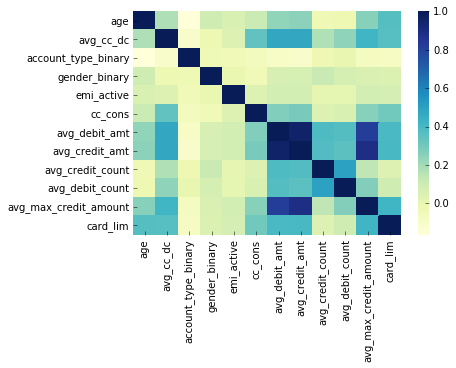

In [109]:
#finding correlation among different parameters
import seaborn as sns
corr = new_df.corr()
sns.heatmap(corr , cmap="YlGnBu")
plt.show()

In [158]:
# check for any correlations between variables
# age,  avg_max_credit_amt , avg_cc_dcand card_lim seem to have a 
# high influence in cc_cons

#avg_debit_amt and avg_credit_amt also seem to have little influence in cc_cons 

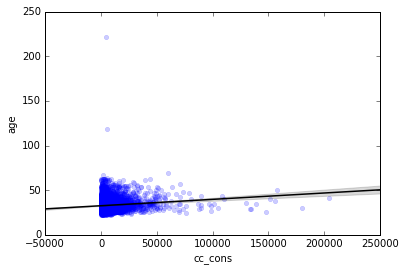

In [159]:
sns.regplot(x='cc_cons',
           y='age',
           data=new_df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})
plt.show()

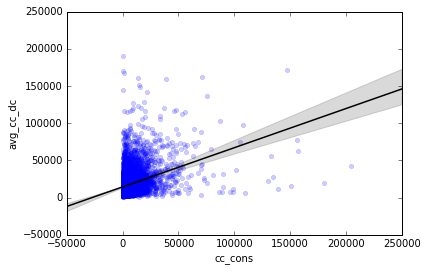

In [152]:
sns.regplot(x='cc_cons',
           y='avg_cc_dc',
           data=new_df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})
plt.show()

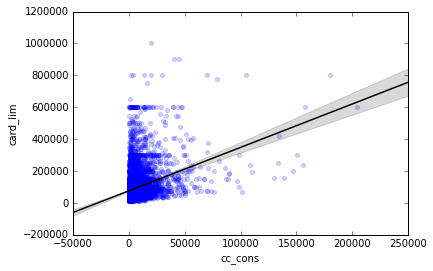

In [153]:
sns.regplot(x='cc_cons',
           y='card_lim',
           data=new_df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})
plt.show()

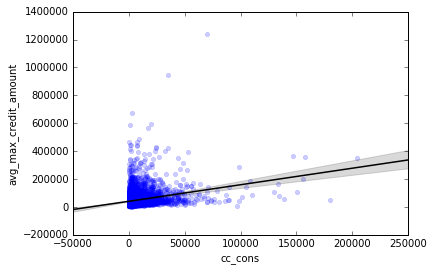

In [154]:
sns.regplot(x='cc_cons',
           y='avg_max_credit_amount',
           data=new_df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})
plt.show()

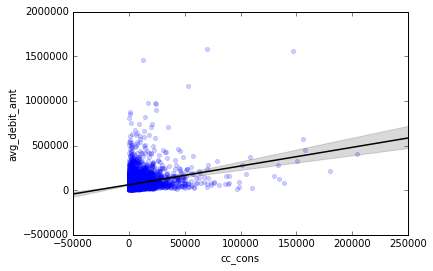

In [155]:
sns.regplot(x='cc_cons',
           y='avg_debit_amt',
           data=new_df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})
plt.show()

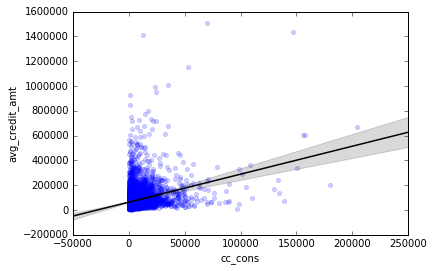

In [157]:
sns.regplot(x='cc_cons',
           y='avg_credit_amt',
           data=new_df,
           scatter_kws={'alpha':0.2, 'color':'blue'},
           line_kws={'color':'black'})
plt.show()

In [129]:
newest_df = df_copy[['id', 'age', 'avg_cc_dc', 'account_type_binary', 'gender_binary', 'emi_active', 'cc_cons', 'avg_debit_amt', 'avg_credit_amt', 'avg_credit_count', 'avg_debit_count', 'avg_max_credit_amount', 'card_lim']]

In [130]:
newest_df

,id,age,avg_cc_dc,account_type_binary,gender_binary,emi_active,cc_cons,avg_debit_amt,avg_credit_amt,avg_credit_count,avg_debit_count,avg_max_credit_amount,card_lim
2,17679,44,12935.216667,1,1,0.00,1970,37864.850000,30430.303333,4.000000,14.000000,15433.333333,65000.0
6,28060,30,6479.276667,1,0,0.00,2052,21470.443333,44498.000000,3.000000,25.666667,33354.666667,30000.0
7,746,32,5669.266667,1,1,0.00,434,35242.046667,35442.000000,3.000000,25.000000,30741.666667,25000.0
12,16231,42,20544.973333,0,1,14638.83,5050,105293.393333,299904.193333,6.333333,25.000000,200140.876667,200000.0
16,29916,38,14111.666667,0,0,8720.71,11835,324041.146667,333441.333333,11.666667,33.333333,113333.333333,110000.0
17,22771,41,5897.576667,1,1,0.00,447,48315.110000,48543.206667,3.666667,26.000000,41350.000000,30000.0
19,5378,31,7681.590000,0,1,6660.24,3023,40895.650000,41122.073333,4.333333,31.666667,29770.000000,40000.0
27,942,27,11339.240000,1,1,0.00,1779,44277.196667,37920.043333,5.666667,21.333333,28496.000000,40000.0
32,7790,35,4829.770000,1,0,0.00,1783,54713.943333,58001.000000,4.000000,21.000000,35467.000000,40000.0
36,43736,35,5298.540000,1,1,0.00,1153,74101.080000,61666.500000,7.333333,24.666667,46105.666667,75000.0


In [591]:
# create x and y
#feature_cols = 'avg_max_credit_amount' 
#newest_df['avg_max_credit_amount'].round()
x_train = newest_df.loc[:,['age','avg_max_credit_amount']] # predictor

y_train = newest_df.cc_cons # response


In [578]:
# instantiate, fit
from sklearn.linear_model import LinearRegression
#x_train= x_train.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)
x_train= np.nan_to_num(x_train)
y_train= np.nan_to_num(y_train)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [579]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [580]:
print regressor.intercept_
#print regressor.coef_

1582.2715534727831


In [530]:
#test set!!

test_df = pd.read_csv('/home/reshu/Desktop/test_9K3DBWQ.csv')
test_df.shape

(14067, 43)

In [424]:
test_df.head(2)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.0,NaN,4551.00,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.0
1,43223,current,M,31,233,44870.36,NaN,34177.0,NaN,25889.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [562]:
test_df['total_cc_dc'] = test_df['cc_cons_apr'] + test_df['cc_cons_may'] + test_df['cc_cons_jun'] + test_df['dc_cons_jun'] + test_df['dc_cons_may'] +  test_df['dc_cons_apr']

In [563]:
test_df['avg_cc_dc'] = test_df['total_cc_dc']/3

In [517]:
test_df['total_max_credit_amount'] = test_df['max_credit_amount_apr'] + test_df['max_credit_amount_may'] + test_df['max_credit_amount_jun']

In [518]:
test_df['avg_max_credit_amount'] = test_df['total_max_credit_amount']/3

In [581]:
# create x and y test sets
#feature_cols = 'avg_max_credit_amount' 
x_test = test_df.loc[:,['avg_cc_dc', 'avg_max_credit_amount']]
#x_test= x_test.reshape(-1, 1)
x_test= np.nan_to_num(x_test)
y_test = regressor.predict(x_test)
y_test
#y_test = test_df.cc_cons # response

array([1582.27155347, 1582.27155347, 2551.93462213, ..., 1582.27155347,
       4631.39480244, 2626.22608478])

In [565]:
regressor.score(x_test, y_test)

1.0

In [582]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse

#y_test = np.array(y_test)
#test_df['cc_cons'] = y_test.toarray().tolist()
#print(df)
data = y_test
#df1 = pd.DataFrame(np.column_stack(list(zip(*y_test))), columns=list('B'))
df1=pd.DataFrame(data, columns=['B']) 
df1



,B
0,1582.271553
1,1582.271553
2,2551.934622
3,1582.271553
4,1582.271553
5,1582.271553
6,1582.271553
7,1582.271553
8,1582.271553
9,2380.997009


In [583]:
df1.rename(columns={'B':'cc_cons'}, 
                 inplace=True)
df1

,cc_cons
0,1582.271553
1,1582.271553
2,2551.934622
3,1582.271553
4,1582.271553
5,1582.271553
6,1582.271553
7,1582.271553
8,1582.271553
9,2380.997009


In [584]:
df2 = test_df[['id']]


In [585]:
new_result=pd.concat([df2, df1], axis=1) 
new_result


,id,cc_cons
0,6975,1582.271553
1,43223,1582.271553
2,45502,2551.934622
3,12368,1582.271553
4,40415,1582.271553
5,31659,1582.271553
6,19585,1582.271553
7,11889,1582.271553
8,43494,1582.271553
9,2536,2380.997009


In [587]:
#Saving to .csv format
new_result.to_csv(r'/home/reshu/Desktop/newest_result_14.csv', index=False)

